In [14]:
from jax import numpy as jnp
import matplotlib.pyplot as plt
import jax.random as random

In [2]:
def ReLU(preactivation):
    return jnp.maximum(0, preactivation)

In [3]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    # Initial lines
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x
    # Activation functions
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)
    # Weight activations
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3
    # Combine weighted activation and add y offset
    y = phi_0 + w_act_1 + w_act_2 + w_act_3
    # Return everything we have calculated
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [4]:
def plot_neural(x, y):
    fig, ax = plt.subplots()
    ax.plot(x.T,y.T)
    ax.set_xlabel('Input'); ax.set_ylabel('Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

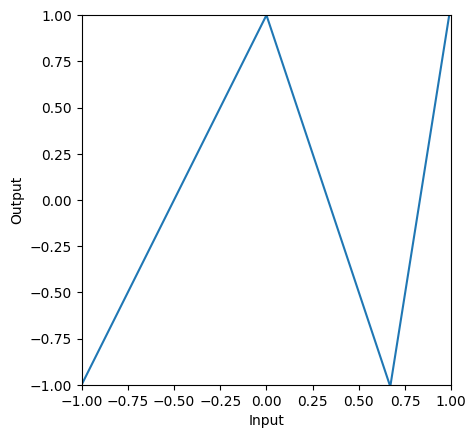

In [5]:
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = jnp.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

In [6]:
beta_0 = jnp.zeros((3,1))
Omega_0 = jnp.zeros((3,1))
beta_1 = jnp.zeros((1,1))
Omega_1 = jnp.zeros((1,3))

beta_0 = beta_0.at[0,0].set(n1_theta_10)
beta_0 = beta_0.at[1,0].set(n1_theta_20)
beta_0 = beta_0.at[2,0].set(n1_theta_30)

Omega_0 = Omega_0.at[0,0].set(n1_theta_11)
Omega_0 = Omega_0.at[1,0].set(n1_theta_21)
Omega_0 = Omega_0.at[2,0].set(n1_theta_31)

beta_1 = beta_1.at[0,0].set(n1_phi_0)
Omega_1 = Omega_1.at[0,0].set(n1_phi_1)
Omega_1 = Omega_1.at[0,1].set(n1_phi_2)
Omega_1 = Omega_1.at[0,2].set(n1_phi_3)


n_data = n1_in.size
n_dim_in = 1
n1_in_mat = jnp.reshape(n1_in,(n_dim_in,n_data))

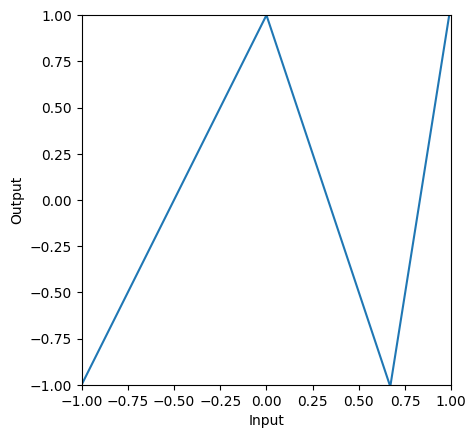

In [7]:
h1 = ReLU(beta_0 + jnp.matmul(Omega_0,n1_in_mat))
n1_out = beta_1 + jnp.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

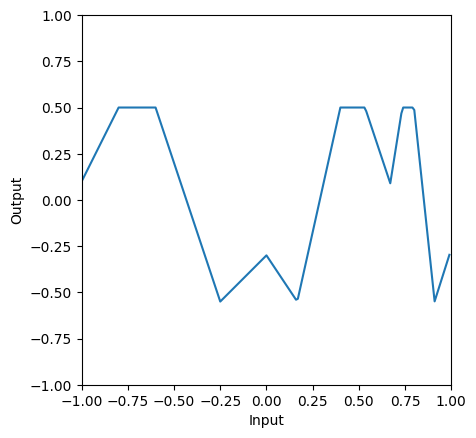

In [8]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = jnp.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

In [11]:
beta_0 = jnp.zeros((3,1))
Omega_0 = jnp.zeros((3,1))
beta_1 = jnp.zeros((3,1))
Omega_1 = jnp.zeros((3,3))
beta_2 = jnp.zeros((1,1))
Omega_2 = jnp.zeros((1,3))

beta_0 = beta_0.at[0,0].set(n1_theta_10)
beta_0 = beta_0.at[1,0].set(n1_theta_20)
beta_0 = beta_0.at[2,0].set(n1_theta_30)

Omega_0 = Omega_0.at[0,0].set(n1_theta_11)
Omega_0 = Omega_0.at[1,0].set(n1_theta_21)
Omega_0 = Omega_0.at[2,0].set(n1_theta_31)

beta_1 = beta_1.at[0,0].set(n2_theta_10 + n2_theta_11 * n1_phi_1)
beta_1 = beta_1.at[1,0].set(n2_theta_20 + n2_theta_21 * n1_phi_1)
beta_1 = beta_1.at[2,0].set(n2_theta_30 + n2_theta_31 * n1_phi_1)

Omega_1 = Omega_1.at[0,0].set(n2_theta_11)
Omega_1 = Omega_1.at[1,0].set(n2_theta_21)
Omega_1 = Omega_1.at[2,0].set(n2_theta_31)

beta_2 = beta_2.at[0,0].set(n2_phi_0)
Omega_2 = Omega_2.at[0,0].set(n2_phi_1)
Omega_2 = Omega_2.at[0,1].set(n2_phi_2)
Omega_2 = Omega_2.at[0,2].set(n2_phi_3)


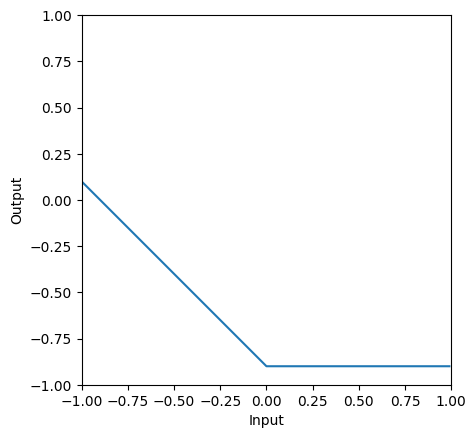

In [12]:
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = jnp.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(beta_0 + jnp.matmul(Omega_0,n1_in_mat))
h2 = ReLU(beta_1 + jnp.matmul(Omega_1,h1))
n1_out = beta_2 + jnp.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

In [17]:
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1
# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4
key = random.PRNGKey(0)
x = random.normal(key, shape=(D_i, n_data))

beta_0 = random.normal(key, shape=(D_1,1))
Omega_0 = random.normal(key, shape=(D_1,D_i))
beta_1 = random.normal(key, shape=(D_2,1))
Omega_1 = random.normal(key, shape=(D_2,D_1))
beta_2 = random.normal(key, shape=(D_3,1))
Omega_2 = random.normal(key, shape=(D_3,D_2))
beta_3 = random.normal(key, shape=(D_o,1))
Omega_3 = random.normal(key, shape=(D_o,D_3))

h1 = ReLU(beta_0 + jnp.matmul(Omega_0,x))
h2 = ReLU(beta_1 + jnp.matmul(Omega_1,h1))
h3 = ReLU(beta_2 + jnp.matmul(Omega_2,h2))
y = beta_3 + jnp.matmul(Omega_3,h3)

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
    print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
    print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
    print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
    print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print ("Output data points")
print(y)

Input data points
[[ 0.08482574  1.9097648   0.29561743  1.120948  ]
 [ 0.33432344 -0.82606775  0.6481277   1.0434873 ]
 [-0.7824839  -0.4539462   0.6297971   0.81524646]
 [-0.32787678 -1.1234448  -1.6607416   0.27290547]]
Output data points
[[ 2.9635382  3.2078516 -1.0504631 -0.1291579]]
